# PROJET TITANIC

In [2]:
import pandas as pd
train = pd.read_csv('train.csv', sep=',')
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [11]:
train.set_index('PassengerId', inplace=True, drop=True )

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# INFORMATION SUR LES DONNEES

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# MODELISATION H0 DU MODEL(PARSING)

In [7]:
def parse_model_0(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target
X,y = parse_model_0(train.copy())    
matrice_corr = X.corr()    
print(matrice_corr)
    
    

           Fare     SibSp     Parch
Fare   1.000000  0.159651  0.216225
SibSp  0.159651  1.000000  0.414838
Parch  0.216225  0.414838  1.000000


In [8]:
def parse_model_0(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target
X,y = parse_model_0(train.copy()) 
print(X,y)

        Fare  SibSp  Parch
0     7.2500      1      0
1    71.2833      1      0
2     7.9250      0      0
3    53.1000      1      0
4     8.0500      0      0
..       ...    ...    ...
886  13.0000      0      0
887  30.0000      0      0
888  23.4500      1      2
889  30.0000      0      0
890   7.7500      0      0

[891 rows x 3 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# LA VALIDATION

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean

def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return mean(xval)

# Charger les données
train = pd.read_csv('train.csv', sep=',')

# Appliquer la fonction parse_model_0 pour extraire les caractéristiques et la cible
X, y = parse_model_0(train.copy())

# Initialiser le modèle de régression logistique
lr = LogisticRegression()

# Calculer le score de validation croisée
score = compute_score(lr, X, y)
print("Score de validation croisée:", score)


Score de validation croisée: 0.6746092524009792


# ETUDE DES VARIABLES

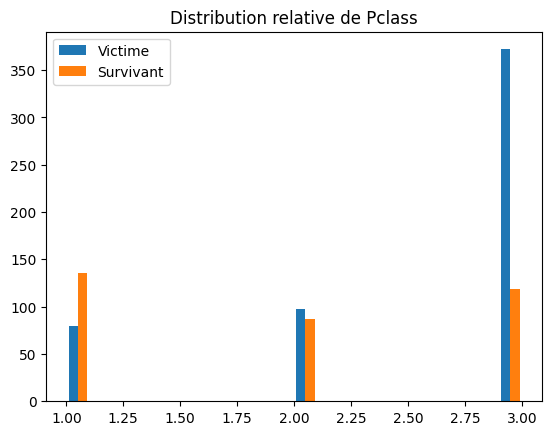

In [22]:

import matplotlib.pyplot as plt

survived = train[train.Survived == 1]
dead = train[train.Survived == 0]

def plot_hist(feature, bins=20):
    x1 = dead[feature].dropna()
    x2 = survived[feature].dropna()
    plt.hist([x1, x2], label=['Victime', 'Survivant'], bins=bins)  # Laisser Matplotlib choisir les couleurs
    plt.legend(loc='upper left')
    plt.title('Distribution relative de %s' % feature)
    plt.show()

plot_hist('Pclass')


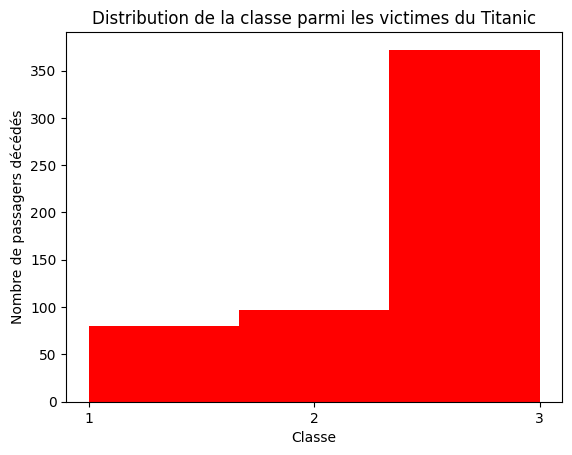

In [23]:


# Filtrer les données des passagers décédés
dead = train[train.Survived == 0]

# Tracer l'histogramme de la classe parmi les victimes
plt.hist(dead['Pclass'], bins=3, color='r')  # Utilisation de 3 bins car il y a 3 classes possibles
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers décédés')
plt.title('Distribution de la classe parmi les victimes du Titanic')
plt.xticks([1, 2, 3])  # Étiquettes pour les classes
plt.show()


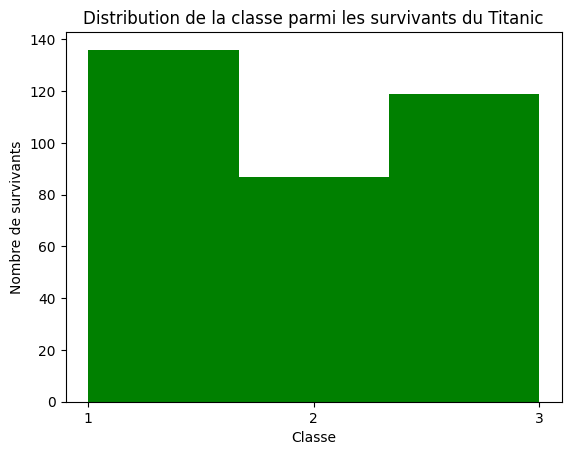

In [24]:


# Filtrer les données des survivants
survived = train[train.Survived == 1]

# Tracer l'histogramme de la classe parmi les survivants
plt.hist(survived['Pclass'], bins=3, color='g')  # Utilisation de 3 bins car il y a 3 classes possibles
plt.xlabel('Classe')
plt.ylabel('Nombre de survivants')
plt.title('Distribution de la classe parmi les survivants du Titanic')
plt.xticks([1, 2, 3])  # Étiquettes pour les classes
plt.show()


# MATRICE DU MODEL 1

In [29]:

def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X['Pclass'], prefix='split_')
    X = X.join(class_dummies)
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del:
        del X[col]
    return X, target
# Appeler la fonction parse_model_1 avec vos données
X_model_1, y_model_1 = parse_model_1(train.copy())

# Afficher la matrice X du modèle 1
print(X_model_1)



     PassengerId  Pclass     Sex  SibSp  Parch     Fare  split__1  split__2  \
0              1       3    male      1      0   7.2500     False     False   
1              2       1  female      1      0  71.2833      True     False   
2              3       3  female      0      0   7.9250     False     False   
3              4       1  female      1      0  53.1000      True     False   
4              5       3    male      0      0   8.0500     False     False   
..           ...     ...     ...    ...    ...      ...       ...       ...   
886          887       2    male      0      0  13.0000     False      True   
887          888       1  female      0      0  30.0000      True     False   
888          889       3  female      1      2  23.4500     False     False   
889          890       1    male      0      0  30.0000      True     False   
890          891       3    male      0      0   7.7500     False     False   

     split__3  
0        True  
1       False  
2  

In [30]:
lr = LogisticRegression()
compute_score(lr, X, y)

0.6746092524009792